## 1. Download Data from Database

* Run the following QUERY from BigQuery:<br/><br/>
    SELECT user_id, city,<br/>
     &nbsp;count(case when cuisine_parent = 'Breakfast' then order_id end) as Breakfast_Count,<br/>
     &nbsp;avg(case when cuisine_parent = 'Breakfast' then basket end) as AVG_Breakfast_Basket,<br/>
     &nbsp;count(order_id) as Total_Orders,<br/>
     &nbsp;avg(basket) as AVG_Basket, <br/>
     &nbsp;&nbsp;FROM `bi-2019-test.ad_hoc.orders_jan2021`<br/>
     &nbsp;group by  user_id, city
     

* Save results in csv

## 2. Import Dataset

In [160]:
import pandas as pd
import numpy as np

db = pd.read_csv('bq-results-20210501-155047-cphk1kli3rrc.csv', sep =',')

In [161]:
db

,user_id,city,Breakfast_Count,AVG_Breakfast_Basket,Total_Orders,AVG_Basket
0,110800200,Μεσολόγγι,10,2.480000,11,3.672727
1,93529730,Ιεράπετρα Κρήτη,9,5.600000,9,5.600000
2,46288512,Πύργος,13,3.569231,19,4.531579
3,45641982,Πύργος,9,3.722222,9,3.722222
4,112689466,Διδυμότειχο,15,2.973333,17,3.711765
...,...,...,...,...,...,...
164951,185986326,Άγιος Νικόλαος Κρήτη,7,3.171429,7,3.171429
164952,86994372,Άγιος Νικόλαος Κρήτη,7,4.557143,12,5.683333
164953,4201134,Άγιος Νικόλαος Κρήτη,7,4.228571,7,4.228571
164954,59787258,Άγιος Νικόλαος Κρήτη,7,3.614286,8,3.787500


## 3. Check for Missing Values and Duplicates 

In [162]:
db.info(verbose = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164956 entries, 0 to 164955
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               164956 non-null  int64  
 1   city                  164956 non-null  object 
 2   Breakfast_Count       164956 non-null  int64  
 3   AVG_Breakfast_Basket  70766 non-null   float64
 4   Total_Orders          164956 non-null  int64  
 5   AVG_Basket            164956 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 7.6+ MB


In [163]:
# Replace null values on AVG_Breakfast_Basket with zeros
db['AVG_Breakfast_Basket'] = db['AVG_Breakfast_Basket'].replace(np.nan, 0)


In [164]:
# Check for Duplicates
duplicateRows = db[db.duplicated()]
duplicateRows

,user_id,city,Breakfast_Count,AVG_Breakfast_Basket,Total_Orders,AVG_Basket


## 4. Create Useful Variables

In [165]:
# Create Breakfast Revenue of Customer
db['Breakfast_Revenue'] = db['Breakfast_Count']*db['AVG_Breakfast_Basket']
# Create Total Revenue of Customer
db['Total_Revenue'] = db['Total_Orders']*db['AVG_Basket']




In [166]:
# Check Breakfast orders by city

cities = pd.DataFrame(db.groupby('city')['Breakfast_Count'].sum())
cities

,Breakfast_Count
city,
Άγιος Νικόλαος Κρήτη,1267
Άργος,192
Άρτα,1240
Έδεσσα,81
Αίγινα,3
...,...
Φλώρινα,50
Χίος,14
Χαλκίδα,4676


In [167]:
# Check distribution
cities['Breakfast_Count'].describe()

count       91.000000
mean      1652.098901
std       3450.617307
min          0.000000
25%         10.000000
50%        182.000000
75%       1872.500000
max      20053.000000
Name: Breakfast_Count, dtype: float64

<AxesSubplot:ylabel='Frequency'>

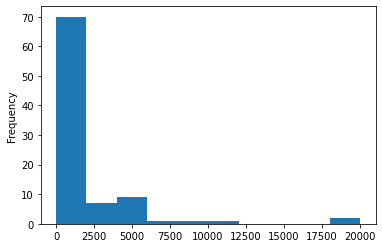

In [168]:
import matplotlib.pyplot as plt

cities['Breakfast_Count'].plot.hist()

In [169]:
# Rename Column and merge Dfs
cities.rename(columns = {'Breakfast_Count': 'Breakfast_City_Orders'}, inplace = True)
cities

,Breakfast_City_Orders
city,
Άγιος Νικόλαος Κρήτη,1267
Άργος,192
Άρτα,1240
Έδεσσα,81
Αίγινα,3
...,...
Φλώρινα,50
Χίος,14
Χαλκίδα,4676


In [170]:
db2 = db.merge(cities, on='city', how= 'left')
db2

,user_id,city,Breakfast_Count,AVG_Breakfast_Basket,Total_Orders,AVG_Basket,Breakfast_Revenue,Total_Revenue,Breakfast_City_Orders
0,110800200,Μεσολόγγι,10,2.480000,11,3.672727,24.8,40.4,378
1,93529730,Ιεράπετρα Κρήτη,9,5.600000,9,5.600000,50.4,50.4,1012
2,46288512,Πύργος,13,3.569231,19,4.531579,46.4,86.1,363
3,45641982,Πύργος,9,3.722222,9,3.722222,33.5,33.5,363
4,112689466,Διδυμότειχο,15,2.973333,17,3.711765,44.6,63.1,484
...,...,...,...,...,...,...,...,...,...
164951,185986326,Άγιος Νικόλαος Κρήτη,7,3.171429,7,3.171429,22.2,22.2,1267
164952,86994372,Άγιος Νικόλαος Κρήτη,7,4.557143,12,5.683333,31.9,68.2,1267
164953,4201134,Άγιος Νικόλαος Κρήτη,7,4.228571,7,4.228571,29.6,29.6,1267
164954,59787258,Άγιος Νικόλαος Κρήτη,7,3.614286,8,3.787500,25.3,30.3,1267


## 5. Cluster Customers

In [171]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Prepare Dataset for Clustering
con_feats = ['Breakfast_Count','AVG_Breakfast_Basket','Total_Orders','AVG_Basket','Breakfast_Revenue','Total_Revenue','Breakfast_City_Orders']
scale = StandardScaler()

db2copy = db2.copy()

db2copy[con_feats] = scale.fit_transform(db2copy[con_feats])
db2copy

,user_id,city,Breakfast_Count,AVG_Breakfast_Basket,Total_Orders,AVG_Basket,Breakfast_Revenue,Total_Revenue,Breakfast_City_Orders
0,110800200,Μεσολόγγι,5.552009,0.038188,3.756091,-0.951647,2.455741,0.964931,-1.132542
1,93529730,Ιεράπετρα Κρήτη,4.941133,0.911869,2.880046,-0.649208,5.555738,1.466266,-1.041881
2,46288512,Πύργος,7.384638,0.343201,7.260270,-0.816871,5.071363,3.256034,-1.134687
3,45641982,Πύργος,4.941133,0.386042,2.880046,-0.943880,3.509256,0.619009,-1.134687
4,112689466,Διδυμότειχο,8.606390,0.176334,6.384226,-0.945521,4.853395,2.102962,-1.117384
...,...,...,...,...,...,...,...,...,...
164951,185986326,Άγιος Νικόλαος Κρήτη,3.719381,0.231806,2.004001,-1.030314,2.140898,0.052500,-1.005416
164952,86994372,Άγιος Νικόλαος Κρήτη,3.719381,0.619842,4.194113,-0.636131,3.315506,2.358643,-1.005416
164953,4201134,Άγιος Νικόλαος Κρήτη,3.719381,0.527833,2.004001,-0.864421,3.036990,0.423488,-1.005416
164954,59787258,Άγιος Νικόλαος Κρήτη,3.719381,0.355817,2.442024,-0.933636,2.516288,0.458582,-1.005416


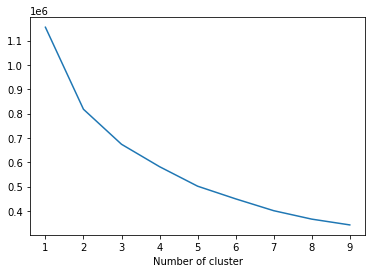

In [172]:
# Cluster only with continuous features
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(db2copy[con_feats])
    db2copy["Clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [174]:
# Select 5 Clusters using the "elbow rule"
kmeans = KMeans(n_clusters=5).fit(db2copy[con_feats])
db2copy["Clusters"] = kmeans.predict(db2copy[con_feats])
Clusters_5_con = db2copy[['user_id','Clusters']]
Clusters_5_con                           

,user_id,Clusters
0,110800200,4
1,93529730,4
2,46288512,4
3,45641982,4
4,112689466,4
...,...,...
164951,185986326,4
164952,86994372,4
164953,4201134,4
164954,59787258,4


In [175]:
db_Clusters_5_con = db2.merge(Clusters_5_con , on='user_id', how= 'left')
db_Clusters_5_con

,user_id,city,Breakfast_Count,AVG_Breakfast_Basket,Total_Orders,AVG_Basket,Breakfast_Revenue,Total_Revenue,Breakfast_City_Orders,Clusters
0,110800200,Μεσολόγγι,10,2.480000,11,3.672727,24.8,40.4,378,4
1,93529730,Ιεράπετρα Κρήτη,9,5.600000,9,5.600000,50.4,50.4,1012,4
2,46288512,Πύργος,13,3.569231,19,4.531579,46.4,86.1,363,4
3,45641982,Πύργος,9,3.722222,9,3.722222,33.5,33.5,363,4
4,112689466,Διδυμότειχο,15,2.973333,17,3.711765,44.6,63.1,484,4
...,...,...,...,...,...,...,...,...,...,...
168999,185986326,Άγιος Νικόλαος Κρήτη,7,3.171429,7,3.171429,22.2,22.2,1267,4
169000,86994372,Άγιος Νικόλαος Κρήτη,7,4.557143,12,5.683333,31.9,68.2,1267,4
169001,4201134,Άγιος Νικόλαος Κρήτη,7,4.228571,7,4.228571,29.6,29.6,1267,4
169002,59787258,Άγιος Νικόλαος Κρήτη,7,3.614286,8,3.787500,25.3,30.3,1267,4


In [176]:
db_Clusters_5_con.groupby('Clusters')[con_feats].mean()

,Breakfast_Count,AVG_Breakfast_Basket,Total_Orders,AVG_Basket,Breakfast_Revenue,Total_Revenue,Breakfast_City_Orders
Clusters,,,,,,,
0,0.040131,0.165421,2.057018,20.466237,0.201257,36.586682,6876.918868
1,1.919719,6.902608,3.250380,8.285012,11.331178,24.961293,6948.553511
2,0.292859,0.903921,1.531666,7.838341,1.033602,11.672646,4609.455074
3,0.529908,1.522276,1.946589,8.446990,1.988333,15.644423,19399.636764
4,5.740396,5.182546,9.138782,7.044353,26.915103,61.793101,9540.390089


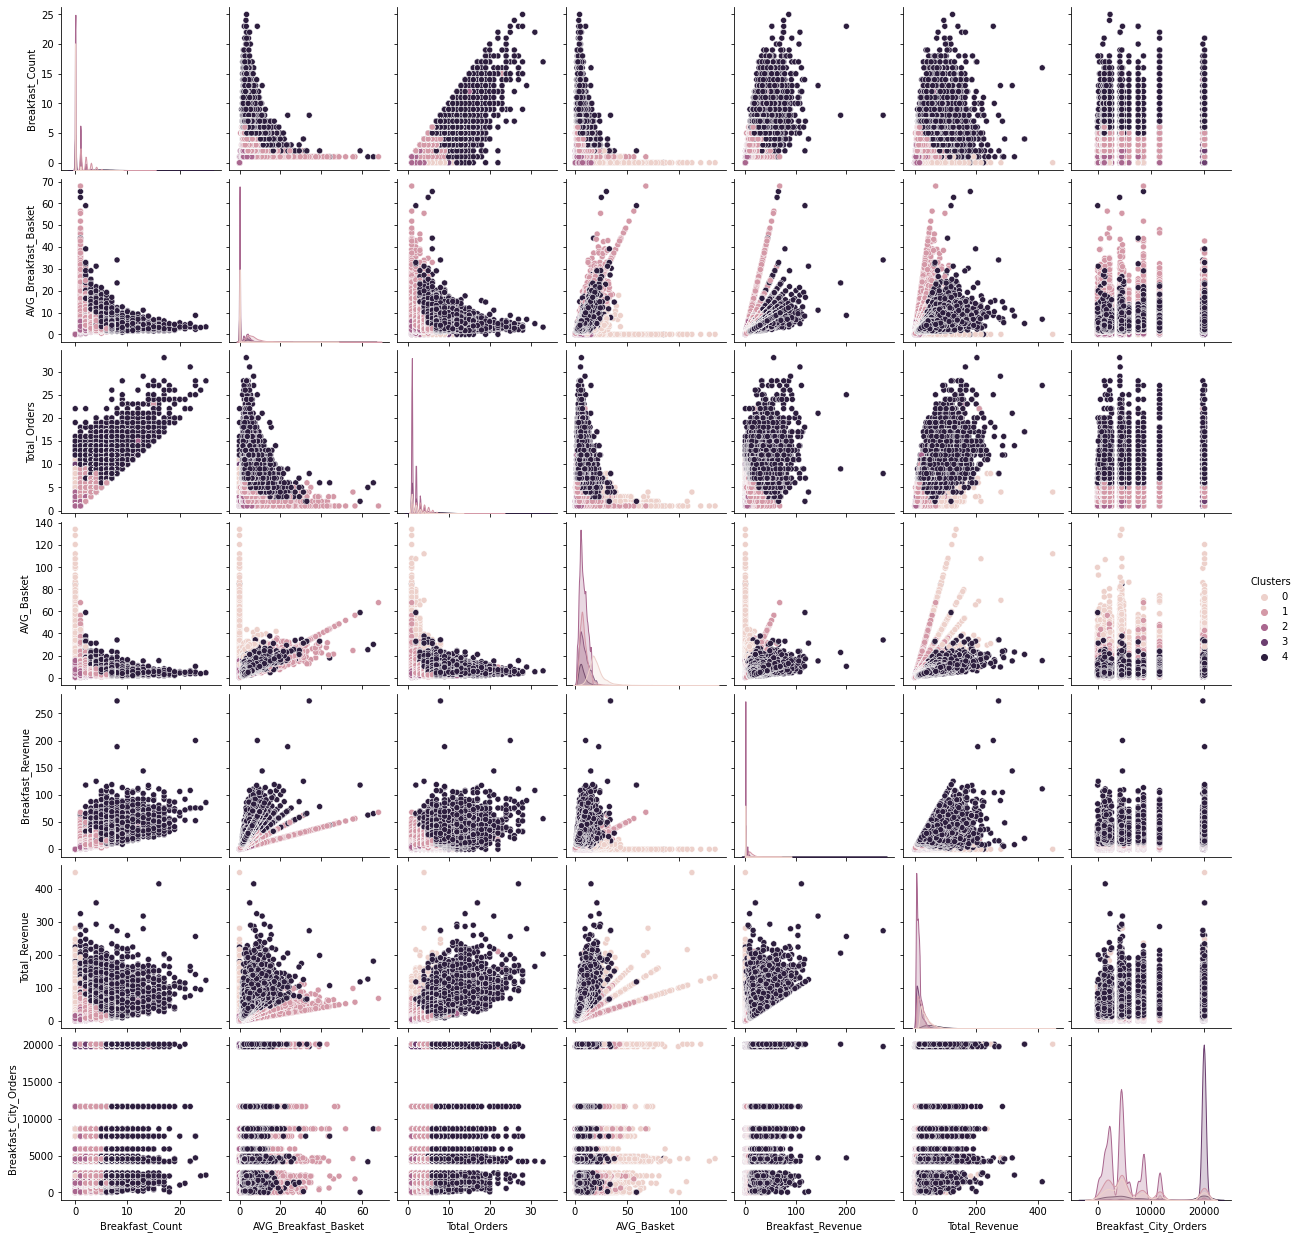

In [182]:
import seaborn as sns
pairplotDf = db_Clusters_5_con[['Breakfast_Count','AVG_Breakfast_Basket','Total_Orders','AVG_Basket','Breakfast_Revenue','Total_Revenue','Breakfast_City_Orders','Clusters']]
sns.pairplot(pairplotDf, hue = 'Clusters')